In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import materialdatabase as mdb

material = mdb.load_material_from_db(material_name="N95")



Read data from the data base.


In [34]:
from matplotlib import pyplot as plt
import pandas as pd

measurements = material["measurements"]["complex_permeability"]["LEA_LK"]["measurement_data"]
print(measurements)


df_measurements = pd.DataFrame()  
list_of_dfs = []
for measurement in measurements:
    # dfItem = pd.read_json(measurement)              
    dfItem = pd.DataFrame.from_records(measurement)   
    list_of_dfs.append(dfItem)  

df_measurements = pd.concat(list_of_dfs, ignore_index=True)


print(df_measurements.loc[(df_measurements["flux_density"] == 0)])



[{'temperature': 30, 'frequency': 100000, 'flux_density': [0.0, 0.0021168, 0.037407155555555564, 0.07269751111111113, 0.10798786666666668, 0.14327822222222225, 0.17856857777777782, 0.21385893333333336, 0.24914928888888893, 0.2844396444444445, 0.31973], 'mu_r_abs': [1774.378590277185, 1804.4082018727245, 2305.0486357360214, 2709.172500854467, 3016.779797228063, 3227.8705248568085, 3342.4446837407036, 3360.5022738797484, 3282.0432952739425, 3107.067747923286, 2835.575631827779], 'mu_phi_deg': [1.3683849204635992, 1.5257575814316642, 4.149405143925484, 6.515500790787598, 8.624044522018007, 10.47503633761671, 12.06847623758371, 13.404364221919003, 14.48270029062259, 15.303484443694474, 15.866716681134653]}, {'temperature': 60, 'frequency': 100000, 'flux_density': [0.0, 0.036261, 0.05597644444444445, 0.07569188888888889, 0.09540733333333334, 0.11512277777777778, 0.13483822222222225, 0.15455366666666667, 0.1742691111111111, 0.19398455555555555, 0.2137], 'mu_r_abs': [2400.4568649926555, 2577.

<AxesSubplot:xlabel='frequency'>

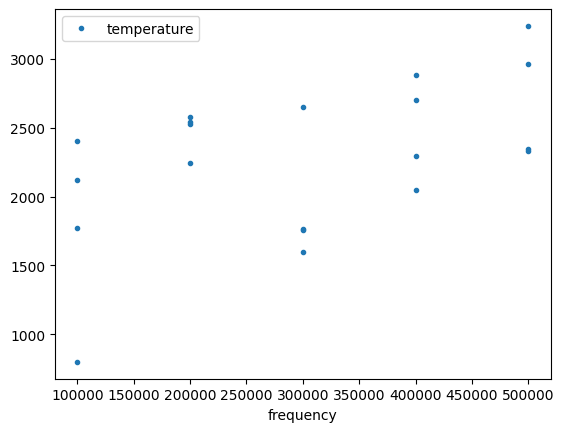

In [35]:
initial = df_measurements.loc[(df_measurements["flux_density"] == 0)]

initial.plot("frequency", "mu_r_abs", style='.', label='temperature')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


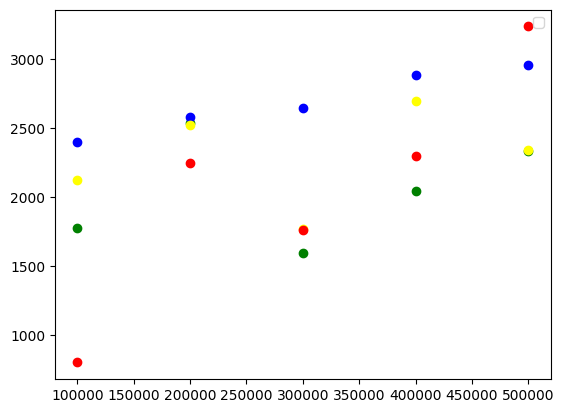

In [41]:
color_dict = {"30": "green",
              "60": "blue",
              "80": "yellow",
              "100": "red"}
intitial_permeability = []
frequency = []
temperature = []
for wp in measurements:
    intitial_permeability.append(wp["mu_r_abs"][0])
    frequency.append(wp["frequency"])
    temperature.append(wp["temperature"])

    # plt.plot(wp["frequency"], wp["mu_r_abs"][0], "o", label=f"{wp['temperature']}")
    # if wp["frequency"] != 200000:
    #     plt.plot(wp["frequency"], wp["mu_r_abs"][0], "o", color=color_dict[f"{wp['temperature']}"])
    plt.plot(wp["frequency"], wp["mu_r_abs"][0], "o", color=color_dict[f"{wp['temperature']}"])
plt.legend()
plt.show()